In [1]:
%matplotlib inline

In [2]:
from dask.distributed import Client

# Scale up: connect to your own cluster with more resources
# see http://dask.pydata.org/en/latest/setup.html
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Client Scheduler: inproc://192.168.1.69/9219/1 Dashboard: http://192.168.1.69:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


In [3]:
import dask_ml.datasets
import dask_ml.cluster
import matplotlib.pyplot as plt

In [4]:
# Scale up: increase n_samples or n_features
X, y = dask_ml.datasets.make_blobs(n_samples=1000000,
                                   chunks=100000,
                                   random_state=0,
                                   centers=3)
X = X.persist()
X

dask.array<concatenate, shape=(1000000, 2), dtype=float64, chunksize=(100000, 2), chunktype=numpy.ndarray>

In [5]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2, oversampling_factor=10)
km.fit(X)

KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

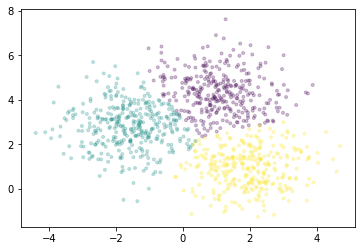

In [6]:
fig, ax = plt.subplots()
ax.scatter(X[::1000, 0], X[::1000, 1], marker='.', c=km.labels_[::1000],
           cmap='viridis', alpha=0.25);

In [ ]:
import time
import gc

In [ ]:
del  client,km, X
gc.collect()